## Text Analysis



In [1]:
import pandas as pd
import numpy as np

# Plot libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Text libraries
import string
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [2]:
def clean_tokenizar(text):
    '''
    This function cleans and tokenize the text into individual words.
     print(string.punctuation)
    re.escape(string.punctuation)
    '''
    new_texto = text.lower()#All lower caps
    new_texto = re.sub('http\S+', ' ', new_texto) #Delete URLs
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_texto = re.sub(regex , ' ', new_texto) #Eliminate puntuation
    new_texto = re.sub("\d+", ' ', new_texto) #Eliminate numbers
    new_texto = re.sub("\\s+", ' ', new_texto) #Eliminate consecutive blank spaces
    new_texto = new_texto.split(sep = ' ') #Tokenization of individual words
    new_texto = [token for token in new_texto if len(token) > 1] #Eliminate tokens larger than 2

    return(new_texto)

In [3]:
test = "This is a VerY bad writtEN TEXt  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining 3232"
print(test)
print(clean_tokenizar(text=test))

This is a VerY bad writtEN TEXt  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining 3232
['this', 'is', 'very', 'bad', 'written', 'text', 'cienciadedatos', 'textmining']


In [4]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/'
tweets_elon   = pd.read_csv(url + "datos_tweets_@elonmusk.csv")

print('Num tweets @elonmusk: ' + str(tweets_elon.shape[0]))
tweets_elon.head(5)

Num tweets @elonmusk: 2678


,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,elonmusk,44196397,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho...",49919,104722,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elonmusk,44196397,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...,5940,33725,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,elonmusk,44196397,2017-11-08T18:55:13Z,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6,34752,104823,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,elonmusk,44196397,2017-11-07T19:48:45Z,9.279862e+17,"@Bob_Richards One rocket, slightly toasted",415,7247,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,elonmusk,44196397,2017-10-28T21:36:18Z,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles l...,207,2128,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tweets = tweets_elon[['screen_name', 'created_at', 'status_id', 'text']]
tweets.columns = ['author', 'date', 'id', 'text']

tweets.head()

,author,date,id,text
0,elonmusk,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...
2,elonmusk,2017-11-08T18:55:13Z,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6
3,elonmusk,2017-11-07T19:48:45Z,9.279862e+17,"@Bob_Richards One rocket, slightly toasted"
4,elonmusk,2017-10-28T21:36:18Z,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles l...


In [6]:
tweets['date'] = pd.to_datetime(tweets['date'])
tweets.head(3)

,author,date,id,text
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-09 17:12:46+00:00,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...
2,elonmusk,2017-11-08 18:55:13+00:00,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6


In [7]:
#Clean the text

tweets['clean_text'] = tweets['text'].apply(lambda x: clean_tokenizar(x))
tweets[['text', 'clean_text']].head()

,text,clean_text
0,"""If one day, my words are against science, cho...","[if, one, day, my, words, are, against, scienc..."
1,I placed the flowers\n\nThree broken ribs\nA p...,"[placed, the, flowers, three, broken, ribs, pi..."
2,Atatürk Anıtkabir https://t.co/al3wt0njr6,"[atatürk, anıtkabir]"
3,"@Bob_Richards One rocket, slightly toasted","[bob, richards, one, rocket, slightly, toasted]"
4,@uncover007 500 ft so far. Should be 2 miles l...,"[uncover, ft, so, far, should, be, miles, long..."


In [8]:
# Unnest the tokenized text
# ==============================================================================
tweets_tidy = tweets.explode(column='clean_text')
tweets_tidy = tweets_tidy.drop(columns='text')
tweets_tidy = tweets_tidy.rename(columns={'clean_text':'token'})
print(tweets_tidy.shape)
tweets_tidy.head(5)


(33617, 4)


,author,date,id,token
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,if
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,one
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,day
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,my
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,words


In [9]:
#unique token words
tweets_tidy['token'].nunique()

6628

In [10]:
nltk.download('stopwords')
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Filter stopwords from data

tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

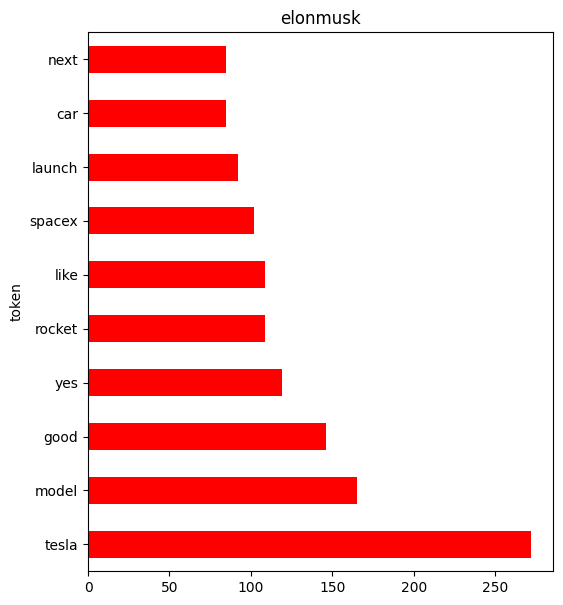

In [12]:
fig, axs = plt.subplots(figsize=(6, 7))
for i, autor in enumerate(tweets_tidy.author.unique()):
    df_temp = tweets_tidy[tweets_tidy.author == autor]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='r')
    axs.set_title(autor)

In [13]:
lexicon = pd.read_table('https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
                        names = ['word', 'sentiment'])
lexicon.head(10)

,word,sentiment
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [14]:
tweets_sentimientos = pd.merge(
                            left     = tweets_tidy,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "word",
                            how      = "inner"
                      )

tweets_sentimientos = tweets_sentimientos.drop(columns = "word")

# Se suman los sentimientos de las palabras que forman cada tweet.
tweets_sentimientos = tweets_sentimientos[["author","date", "id", "sentiment"]] \
                      .groupby(["author", "date", "id"])\
                      .sum().reset_index()
tweets_sentimientos.head()

,author,date,id,sentiment
0,elonmusk,2013-03-17 18:20:24+00:00,3.133541e+17,-2
1,elonmusk,2013-03-17 18:32:54+00:00,3.133573e+17,6
2,elonmusk,2013-03-20 01:00:37+00:00,3.141796e+17,5
3,elonmusk,2013-03-23 00:04:01+00:00,3.152526e+17,-1
4,elonmusk,2013-03-23 00:26:25+00:00,3.152582e+17,0


In [15]:
def perfil_sentimientos(df):
    print(f"Positive: {round(100 * np.mean(df.sentiment > 0), 2)}")
    print(f"Neutral  : {round(100 * np.mean(df.sentiment == 0), 2)}")
    print(f"Negative: {round(100 * np.mean(df.sentiment < 0), 2)}")
    print(" ")


perfil_sentimientos(tweets_sentimientos)

Positive: 73.14
Neutral  : 4.29
Negative: 22.57
 


## Using a data set of reviews

In [16]:
import pandas as pd
df = pd.read_csv('data/Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
data_reviews = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator'], axis =1)
data_reviews.head(5)

,Score,Time,Summary,Text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
data_reviews.shape

(568454, 4)

In [19]:
N = 567000
data_reviews = data_reviews.iloc[:-N , :]
data_reviews.shape

(1454, 4)

In [20]:
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

data_reviews['Cleaned Reviews'] = data_reviews['Text'].apply(clean)
data_reviews.head()

,Score,Time,Summary,Text,Cleaned Reviews
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...


In [21]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mayraberrones/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data_reviews['POS tagged'] = data_reviews['Cleaned Reviews'].apply(token_stop_pos)
data_reviews.head()

,Score,Time,Summary,Text,Cleaned Reviews,POS tagged
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,"[(bought, v), (several, a), (Vitality, n), (ca..."
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,"[(Product, n), (arrived, v), (labeled, v), (Ju..."
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"[(confection, n), (around, None), (centuries, ..."
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,"[(looking, v), (secret, a), (ingredient, n), (..."
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...,"[(Great, n), (taffy, n), (great, a), (price, n..."


In [23]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data_reviews['Lemma'] = data_reviews['POS tagged'].apply(lemmatize)
data_reviews.head()

,Score,Time,Summary,Text,Cleaned Reviews,POS tagged,Lemma
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,"[(bought, v), (several, a), (Vitality, n), (ca...",buy several Vitality can dog food product fi...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,"[(Product, n), (arrived, v), (labeled, v), (Ju...",Product arrive label Jumbo Salted Peanuts pe...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"[(confection, n), (around, None), (centuries, ...",confection around century light pillowy citr...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,"[(looking, v), (secret, a), (ingredient, n), (...",look secret ingredient Robitussin believe fi...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...,"[(Great, n), (taffy, n), (great, a), (price, n...",Great taffy great price wide assortment yumm...


In [24]:
dataset = data_reviews[['Text', 'Lemma']]

## Texblob

In [25]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
dataset['Polarity'] = dataset['Lemma'].apply(getPolarity)
dataset['Analysis'] = dataset['Polarity'].apply(analysis)
dataset.head()

,Text,Lemma,Polarity,Analysis
0,I have bought several of the Vitality canned d...,buy several Vitality can dog food product fi...,0.466667,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Product arrive label Jumbo Salted Peanuts pe...,0.216667,Positive
2,This is a confection that has been around a fe...,confection around century light pillowy citr...,0.187000,Positive
3,If you are looking for the secret ingredient i...,look secret ingredient Robitussin believe fi...,0.150000,Positive
4,Great taffy at a great price. There was a wid...,Great taffy great price wide assortment yumm...,0.458333,Positive


In [27]:
polarity_counts = dataset.Analysis.value_counts()
polarity_counts

Analysis
Positive    1291
Negative     134
Neutral       29
Name: count, dtype: int64

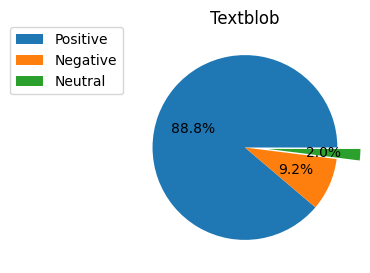

In [28]:
plt.figure(figsize=(9, 3))
plt.pie(polarity_counts.values, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title('Textblob')
plt.legend(loc='upper right',labels = polarity_counts.index, bbox_to_anchor=(0, 1.05))
plt.show()

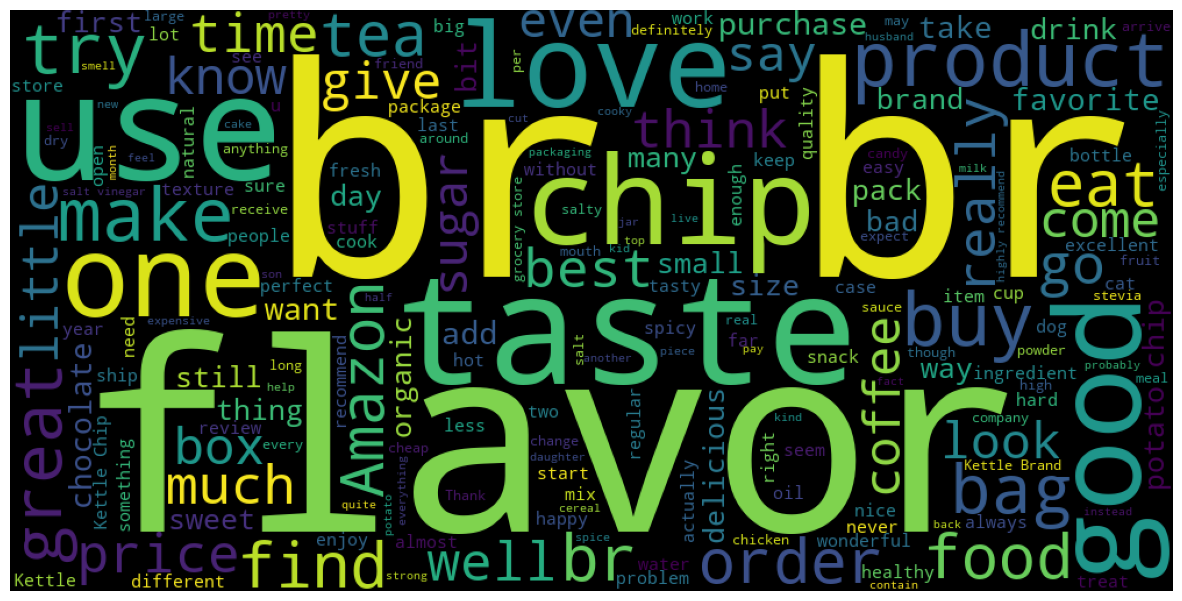

In [30]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(dataset['Lemma'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()